# Interpreted Stratal Horizon Lengths Used to Chart Variations in Formation Bed Length and Uncertainty Analysis Across the Ruhr Coalfield

## Horizons Uncertainty Analysis

![](https://i.imgur.com/DmVRZks.png)

## Section-1

In [1]:
import pandas as pd

In [2]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-1-Hr-Lengths.csv", skiprows=3)

In [3]:
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)

In [4]:
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]

In [5]:
Horizon_ls = raw_df['Horizon'].values

In [6]:
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()

In [7]:
data_df.insert(0, 'Horizon', Horizon_ls)

In [8]:
data_df['line_style'].unique()

array([1., 2.])

In [9]:
'''
Solid 	1	Level-2 
Dashed	2	Level-4
Dashed-Doted	4	Level-3
Doted	3	Level-5
'''
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_5', 6:'Level_1'})

In [10]:
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]

In [11]:
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]

In [12]:
data_df['line_style'].unique()[0]

'Level_2'

In [13]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

In [14]:
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

In [15]:
df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 

In [16]:
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 

In [17]:
horizons_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Hrs_names.csv')

In [18]:
result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)

In [19]:
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)

In [20]:
result_df = pd.merge(result_2, result_3, how="left", on=["Horizon"])

In [21]:
Horizontal_length_df = result_df[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3']]

In [22]:
length_df = result_df[['Horizon','length_level2', 'length_level3']]

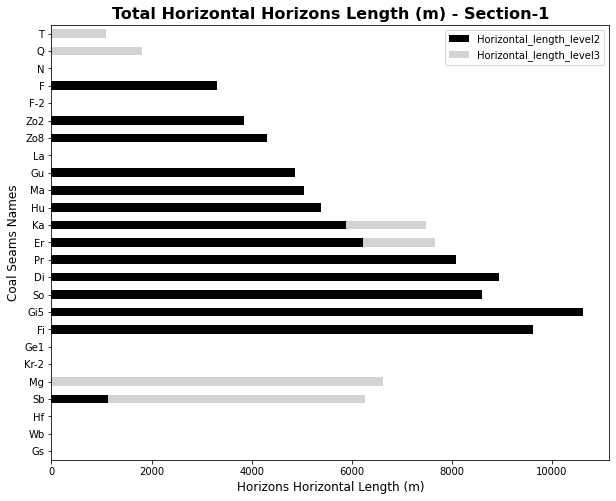

In [23]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-1', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

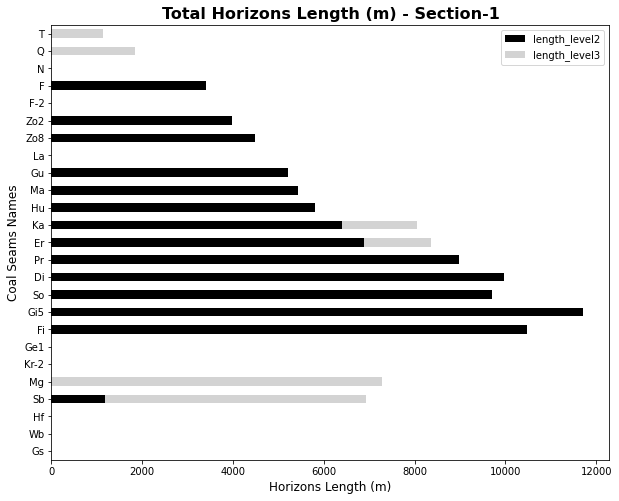

In [24]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-1', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [25]:
length_df.describe()

,length_level2,length_level3
count,25.000000,25.000000
mean,3744.177156,764.884591
std,4070.772991,1834.858107
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3403.643936,0.000000
75%,6402.323136,0.000000
max,11706.223349,7274.559340


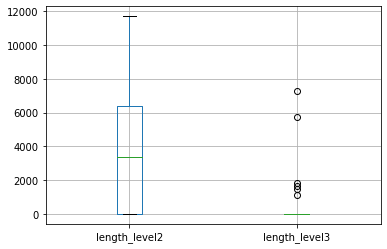

In [27]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3']) 

In [28]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-1-Hr-Lengths.csv")

## Section-2

In [29]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-2-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]

In [30]:
data_df['line_style'].unique()

array(['Level_2', 'Level_4', 'Level_3'], dtype=object)

In [31]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]


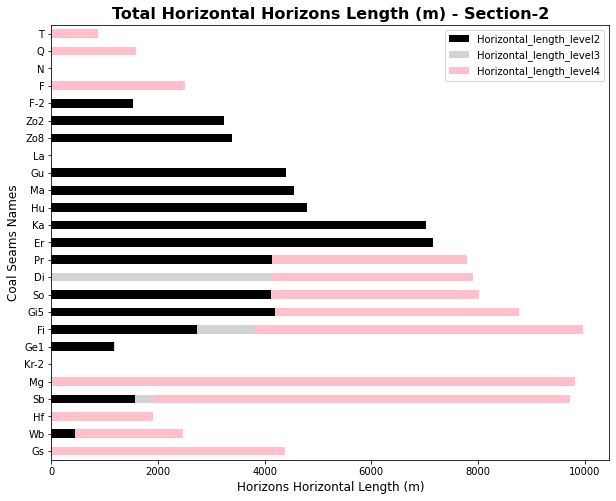

In [32]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-2', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

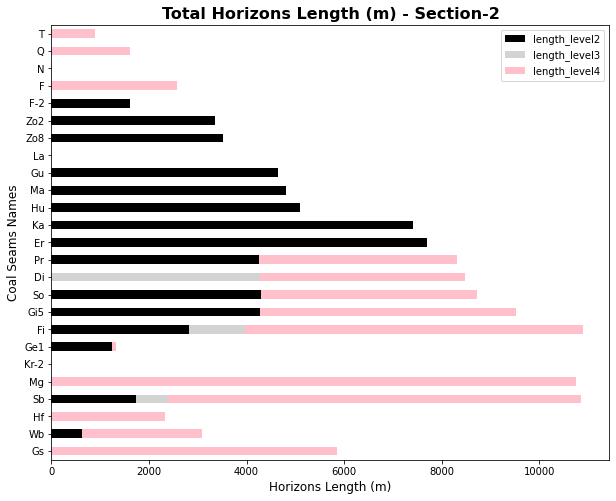

In [33]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-2', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [34]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,2295.338777,243.451508,2396.794597
std,2475.749087,879.259061,3088.398016
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1604.653289,0.000000,901.311756
75%,4275.803803,0.000000,4212.859800
max,7689.685668,4275.444405,10762.097972


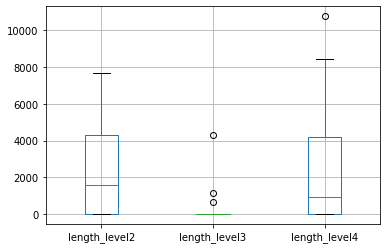

In [35]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [36]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-2-Hr-Lengths.csv")

## Section-3

In [37]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-3-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]

In [38]:
data_df['line_style'].unique()

array(['Level_2', 'Level_4', 'Level_3'], dtype=object)

In [39]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]


In [128]:
Horizontal_length_df

,Horizon,Horizontal_length_level2,Horizontal_length_level3,Horizontal_length_level4
0,T,244.645894,145.270294,1529.831079
1,Q,285.080845,0.000000,1735.187324
2,N,0.000000,0.000000,0.000000
3,F,0.000000,218.622628,2150.411342
4,F-2,0.000000,0.000000,0.000000
5,Zo2,5967.030176,0.000000,2362.006959
6,Zo8,5862.434439,0.000000,2341.247693
7,La,452.277407,0.000000,0.000000
8,Gu,4077.346415,1861.962005,3017.281850
9,Ma,3558.817850,335.978994,5244.640666


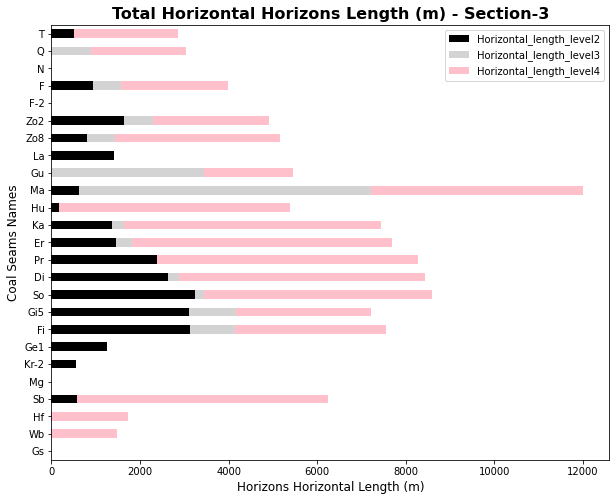

In [40]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-3', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

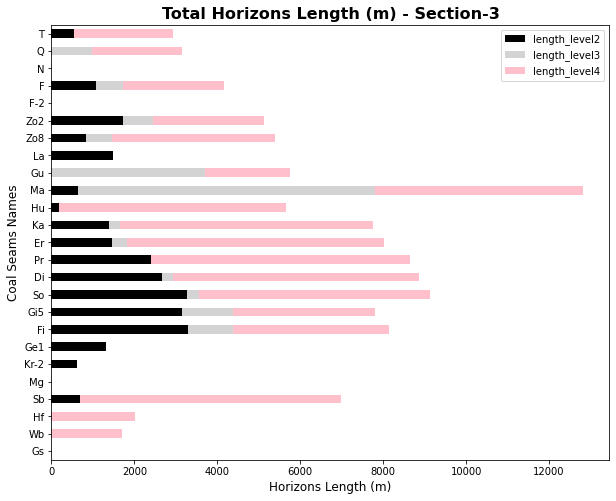

In [41]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-3', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [42]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1068.244174,692.879553,2935.096102
std,1120.546158,1556.046625,2379.916148
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,679.788492,0.000000,2446.233575
75%,1480.441831,652.332125,5458.536793
max,3290.239914,7150.729726,6291.825290


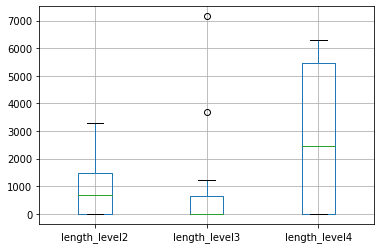

In [43]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [44]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-3-Hr-Lengths.csv")

## Section-4

In [45]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-4-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]

In [46]:
data_df['line_style'].unique()

array(['Level_3', 'Level_2', 'Level_4'], dtype=object)

In [47]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

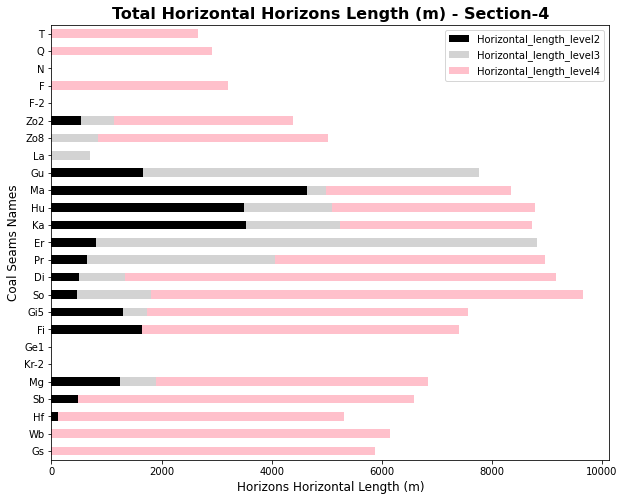

In [48]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-4', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

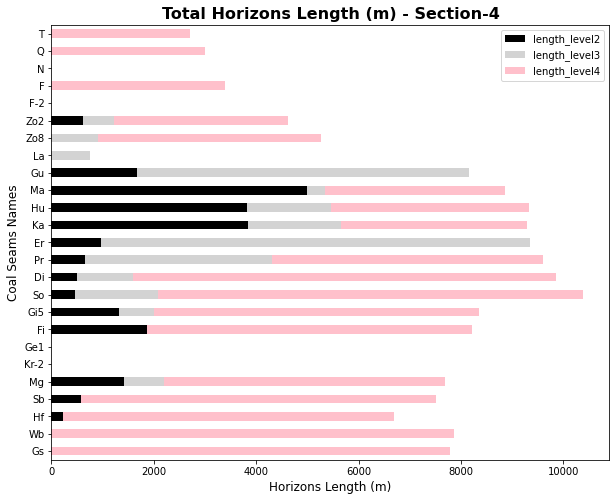

In [49]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-4', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [50]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,916.600704,1150.538582,3877.903809
std,1380.981540,2095.563988,2966.237577
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,466.975699,354.478474,3646.123526
75%,1318.190413,1083.431667,6357.827194
max,4986.813668,8386.489220,8299.154275


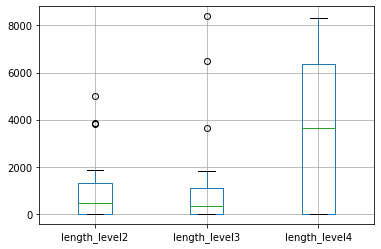

In [51]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [52]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-4-Hr-Lengths.csv")

## Section-5

In [53]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-5-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]

In [54]:
data_df['line_style'].unique()

array(['Level_4', 'Level_3', 'Level_2'], dtype=object)

In [55]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

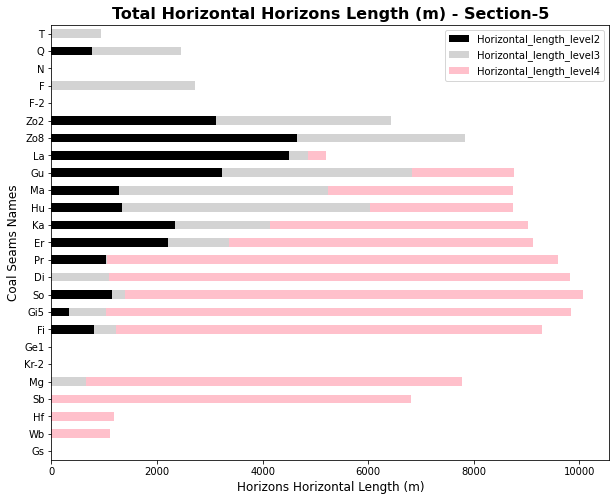

In [56]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-5', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

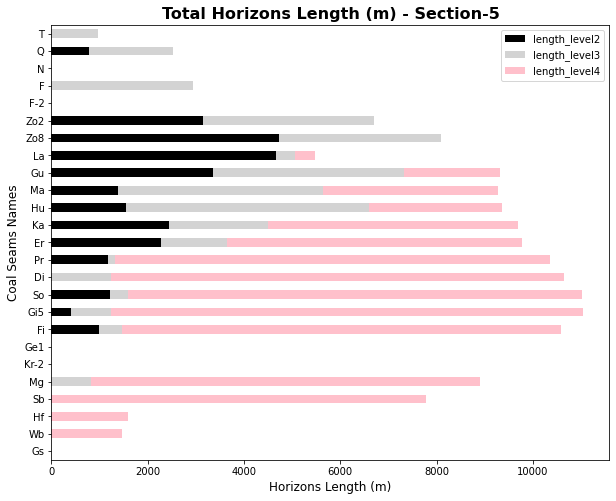

In [57]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-5', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [58]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1125.059859,1341.080416,3434.374912
std,1495.895064,1589.746788,3892.623078
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,414.537914,817.306512,1585.890738
75%,1539.311694,2055.696063,7784.439387
max,4724.157407,5051.508105,9809.153330


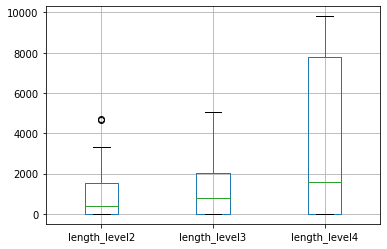

In [59]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [60]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-5-Hr-Lengths.csv")

## Section-6

In [61]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-6-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]

In [62]:
data_df['line_style'].unique()

array(['Level_2', 'Level_3', 'Level_4'], dtype=object)

In [63]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

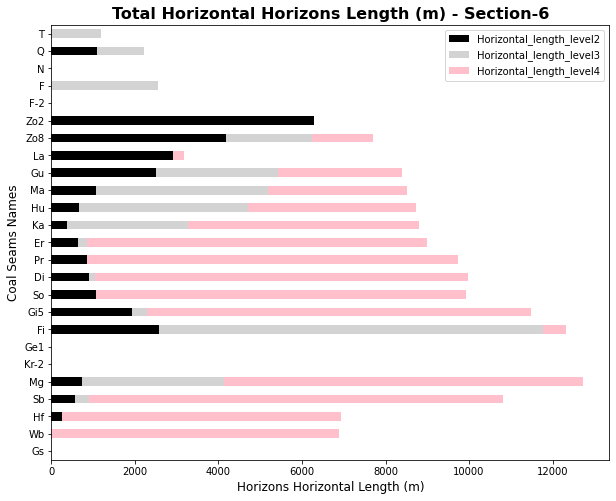

In [64]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-6', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

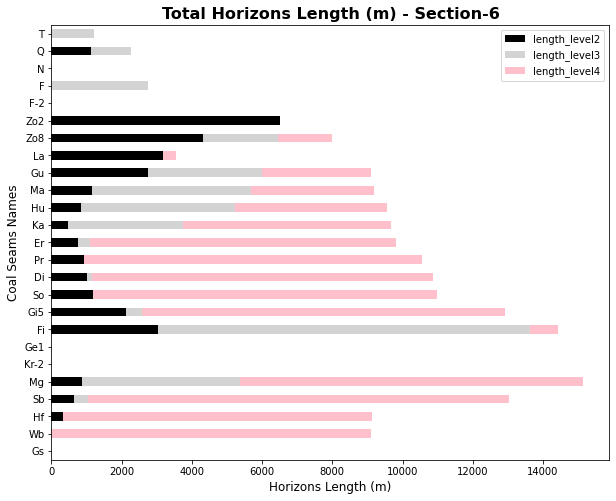

In [65]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-6', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [66]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1250.381113,1562.756864,4296.454178
std,1606.813342,2480.755506,4484.367109
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,855.202094,348.673755,3100.058557
75%,1179.879645,2756.675086,9098.201620
max,6499.353337,10593.444759,11996.380292


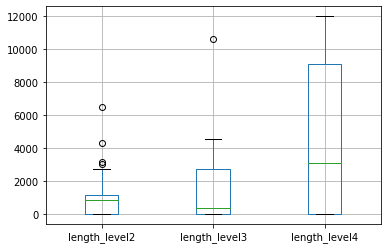

In [67]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [68]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-6-Hr-Lengths.csv")

## Section-7

In [69]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-7-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]

In [70]:
data_df['line_style'].unique()

array(['Level_4', 'Level_2', 'Level_3'], dtype=object)

In [71]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

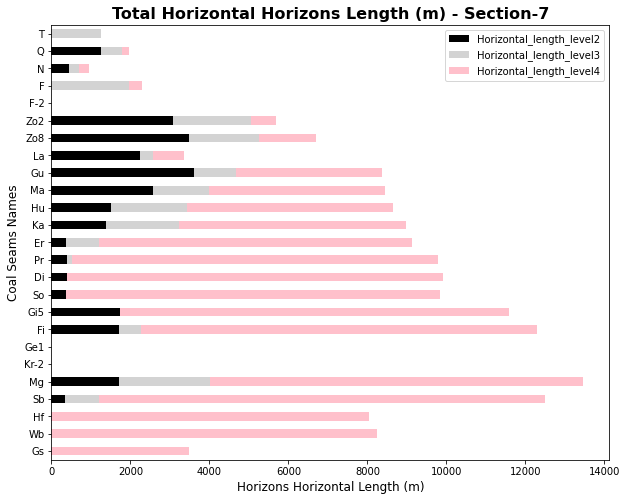

In [72]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-7', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

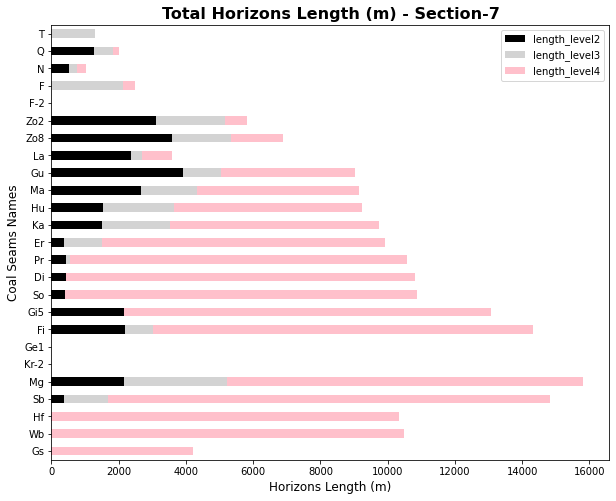

In [73]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-7', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [74]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1157.590778,872.358508,5390.652790
std,1261.823993,931.525471,4746.259219
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,341.920659
50%,436.512101,551.121432,4815.972832
75%,2171.553695,1661.834395,10378.028425
max,3901.593168,3079.378080,13126.073021


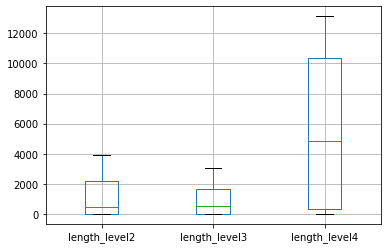

In [75]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [76]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-7-Hr-Lengths.csv")

## Section-8

In [77]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-8-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]

In [78]:
data_df['line_style'].unique()

array(['Level_3', 'Level_2', 'Level_4'], dtype=object)

In [79]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

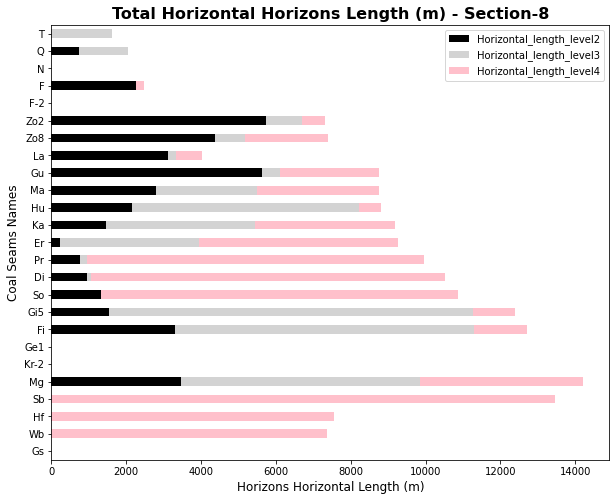

In [80]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-8', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

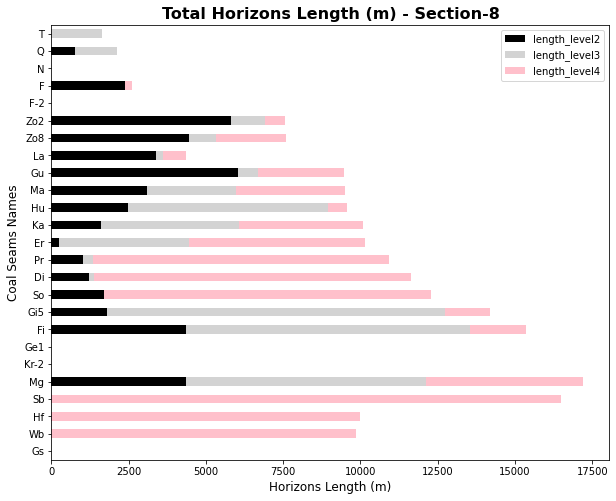

In [81]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-8', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [82]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1786.873515,2088.609114,3827.377694
std,1968.031862,3226.889694,4646.802388
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1217.074297,317.990622,1794.535605
75%,3081.616587,2875.965572,5702.798486
max,6036.890375,10934.818597,16490.203209


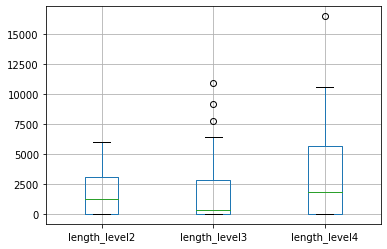

In [83]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [84]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-8-Hr-Lengths.csv")

## Section-9

In [85]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-9-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_2'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]

In [86]:
data_df['line_style'].unique()

array(['Level_2', 'Level_4', 'Level_3'], dtype=object)

In [87]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

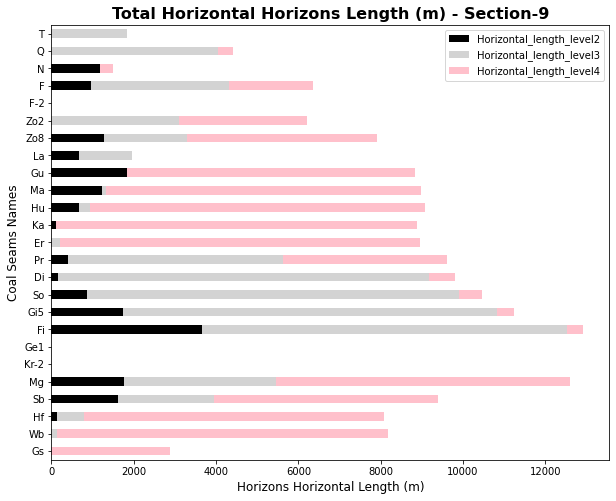

In [88]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-9', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

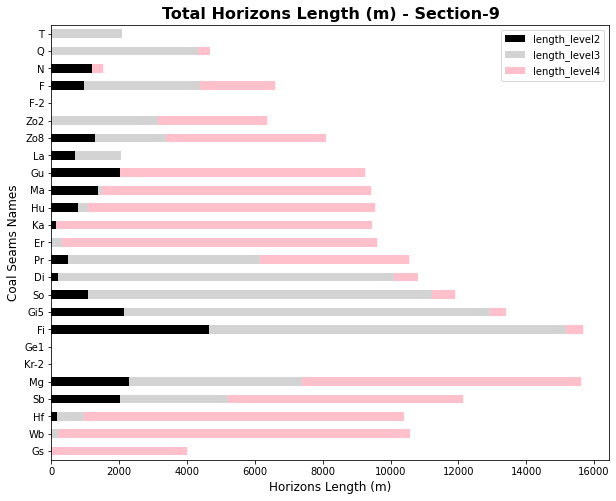

In [89]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-9', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [90]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,859.159780,2920.719889,3966.727927
std,1110.504962,3716.693079,3860.334978
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,380.665574
50%,495.860816,1350.770358,3259.859496
75%,1274.492323,4294.524220,7959.914069
max,4652.113182,10774.684537,10420.430479


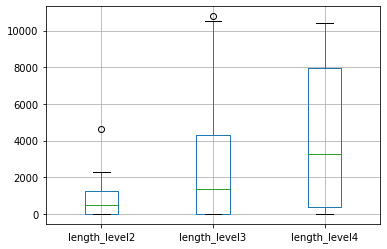

In [91]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [92]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-9-Hr-Lengths.csv")

## Section-10

In [93]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-10-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]

In [94]:
data_df['line_style'].unique()

array(['Level_4', 'Level_2', 'Level_3'], dtype=object)

In [95]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

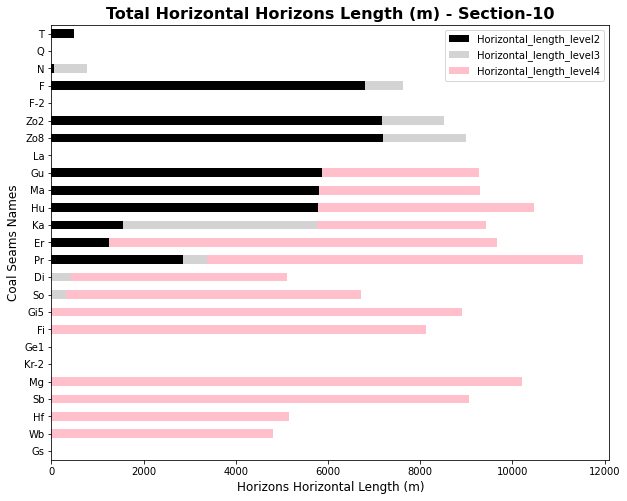

In [96]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-10', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

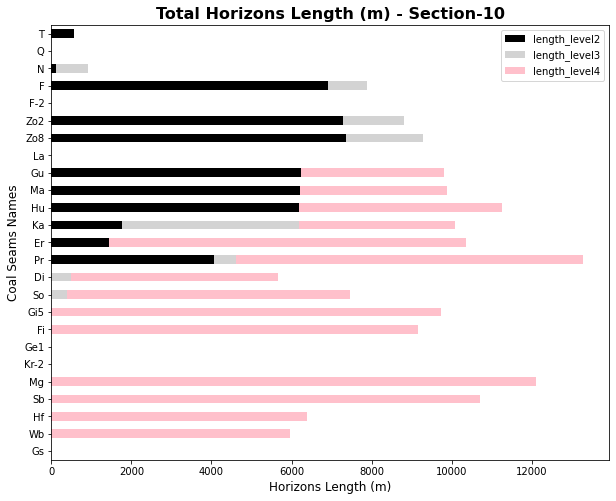

In [97]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-10', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [98]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1923.722910,444.009546,4004.364647
std,2884.931831,978.865112,4153.561954
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3676.152511
75%,4051.901814,480.626913,7072.660432
max,7356.394337,4419.822521,12108.475079


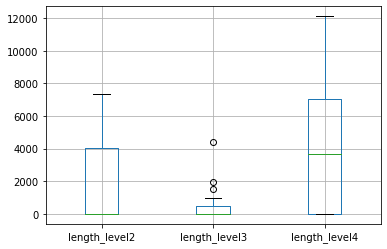

In [99]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [100]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-10-Hr-Lengths.csv")

## Section-11

In [101]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-11-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]

In [102]:
data_df['line_style'].unique()

array(['Level_4', 'Level_2', 'Level_3'], dtype=object)

In [103]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

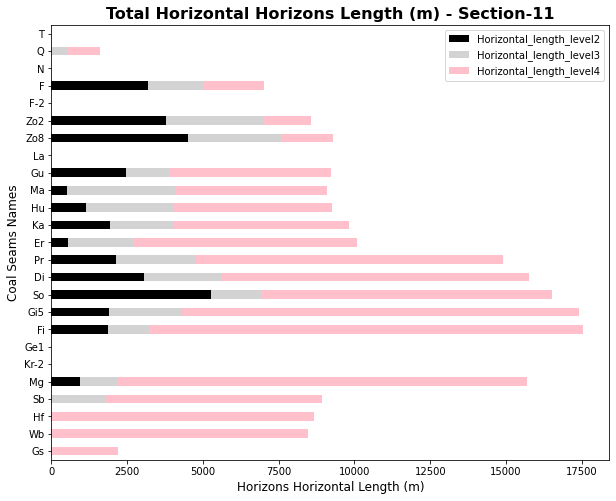

In [104]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-11', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

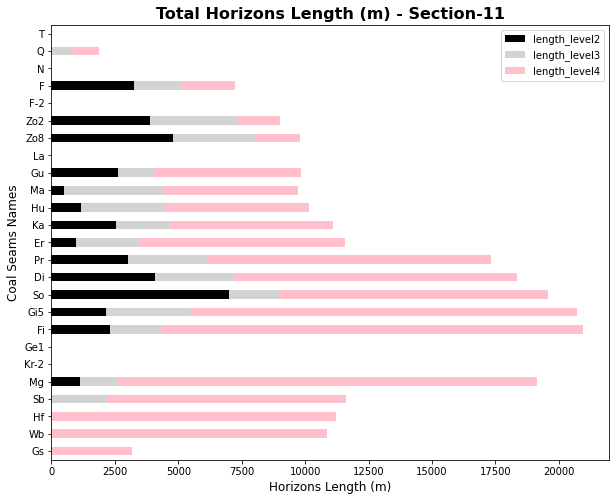

In [105]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-11', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [106]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,1579.012329,1595.342299,6153.059398
std,1921.933478,1408.887119,5593.216359
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1095.673285
50%,976.215318,1895.773848,5687.379629
75%,2611.190645,3096.452061,10878.447452
max,7008.100811,3905.158506,16643.220131


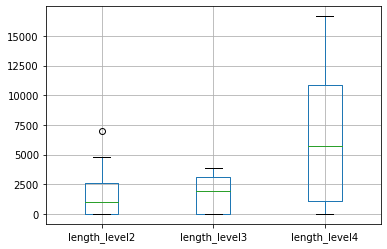

In [107]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

In [108]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-11-Hr-Lengths.csv")

## Section-12

In [109]:
raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Section-12-Hr-Lengths.csv", skiprows=3)
raw_df = raw_df.iloc[3:,:].reset_index(drop=True)
raw_df = raw_df[['Horizon', 'length', 'Horizontal length', 'line_style']]
Horizon_ls = raw_df['Horizon'].values
data_df = raw_df[['length', 'Horizontal length', 'line_style']].astype(float).copy()
data_df.insert(0, 'Horizon', Horizon_ls)
data_df['line_style'] = data_df['line_style'].map({1:'Level_2', 2:'Level_4', 4:'Level_3', 3:'Level_3', 6:'Level_1'})
Level_2_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[2]]
Level_4_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[0]]
Level_3_df = data_df.loc[data_df['line_style'] == data_df['line_style'].unique()[1]]

In [110]:
data_df['line_style'].unique()

array(['Level_4', 'Level_3', 'Level_2'], dtype=object)

In [111]:
df_Level_2 = pd.pivot_table(Level_2_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_4 = pd.pivot_table(Level_4_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()
df_Level_3 = pd.pivot_table(Level_3_df, index=['Horizon'],values=['length', 'Horizontal length'],aggfunc='sum').reset_index()

df_Level_2 = df_Level_2.rename(columns={'Horizontal length' : 'Horizontal_length_level2', 'length' : 'length_level2'}) 
df_Level_3 = df_Level_3.rename(columns={'Horizontal length' : 'Horizontal_length_level3', 'length' : 'length_level3'}) 
df_Level_4 = df_Level_4.rename(columns={'Horizontal length' : 'Horizontal_length_level4', 'length' : 'length_level4'}) 

result_2 = pd.merge(horizons_df, df_Level_2, how="left", on=["Horizon"]).fillna(0)
result_3 = pd.merge(horizons_df, df_Level_3, how="left", on=["Horizon"]).fillna(0)
result_4 = pd.merge(horizons_df, df_Level_4, how="left", on=["Horizon"]).fillna(0)

result_df2 = pd.merge(result_2, result_3, how="left", on=["Horizon"])
result_df3 = pd.merge(result_df2, result_4, how="left", on=["Horizon"])
Horizontal_length_df = result_df3[['Horizon','Horizontal_length_level2', 'Horizontal_length_level3', 'Horizontal_length_level4']]
length_df = result_df3[['Horizon','length_level2', 'length_level3', 'length_level4']]

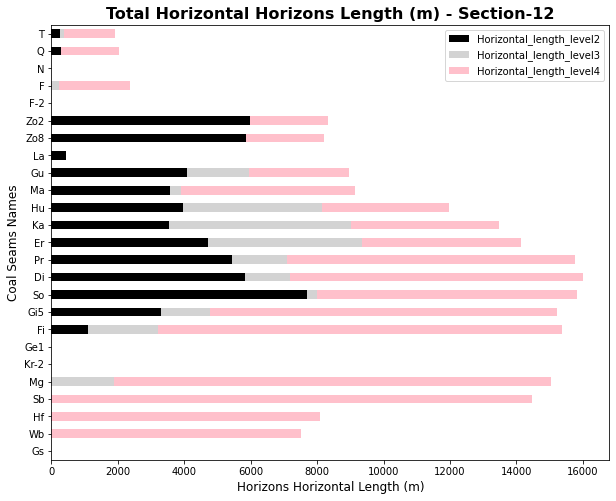

In [112]:
ax = Horizontal_length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizontal Horizons Length (m) - Section-12', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Horizontal Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

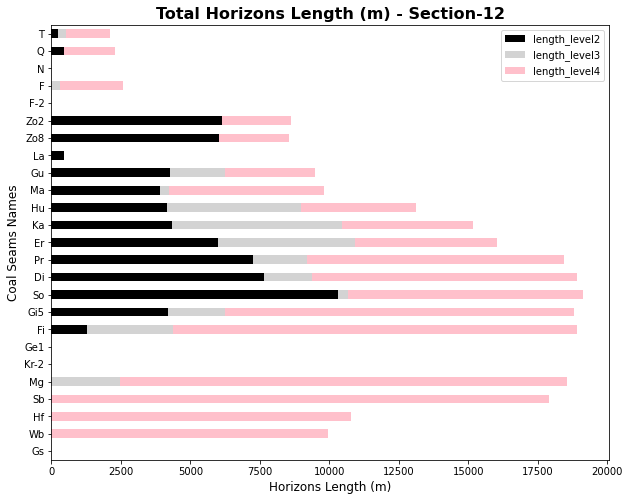

In [113]:
ax = length_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 8), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m) - Section-12', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

In [114]:
length_df.to_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Horizons-Length-Data\Final-output-Section-12-Hr-Lengths.csv")

In [115]:
length_df.describe()

,length_level2,length_level3,length_level4
count,25.000000,25.000000,25.000000
mean,2667.439400,1215.370038,5699.178698
std,3155.112866,1809.845293,5516.791940
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1572.521001
50%,453.672473,284.346495,4157.908923
75%,4341.595784,1992.440783,9509.935596
max,10304.167364,6103.384097,17910.502634


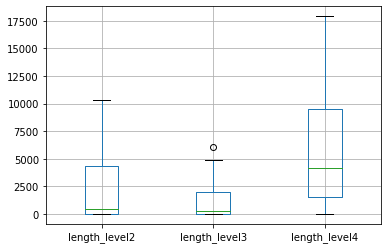

In [116]:
boxplot = length_df.boxplot(column=['length_level2', 'length_level3', 'length_level4']) 

## All Horizons

In [117]:
all_horizons_df = raw_df = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\All-out-plot-Length_Hrs.csv")

In [118]:
all_horizons_ls = all_horizons_df.columns.tolist()[1:]

### Level-2

In [119]:
level_2_ls = ['length_level2',
 'length_level2.1',
  'length_level2.2',
 'length_level2.3',
 'length_level2.4',
 'length_level2.5',
 'length_level2.6',
 'length_level2.7',
 'length_level2.8',
 'length_level2.9',
 'length_level2.10',
 'length_level2.11']

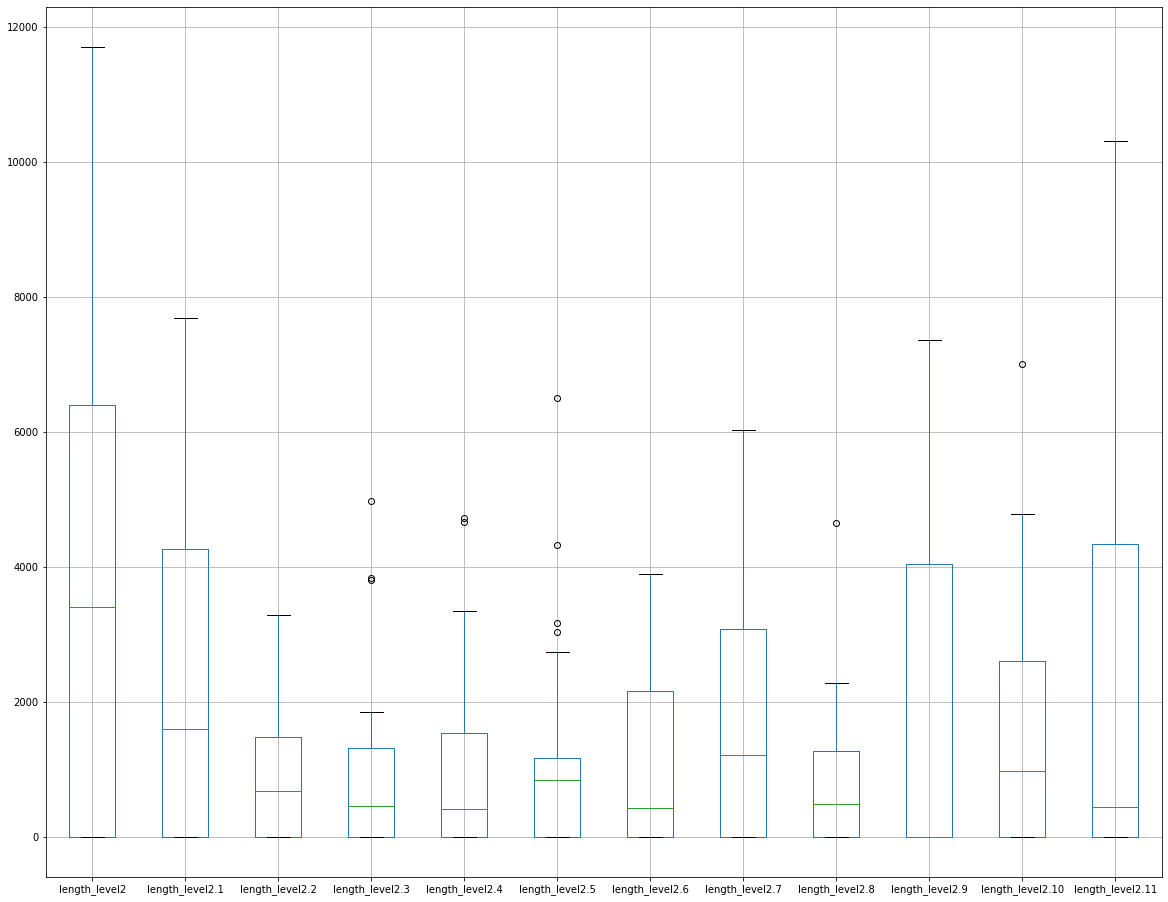

In [120]:
boxplot = all_horizons_df.boxplot(column=level_2_ls, figsize=(20, 16)) 

### Level-3

In [121]:
level_3_ls = ['length_level3',
 'length_level3.1',
 'length_level3.2',
 'length_level3.3',
 'length_level3.4',
 'length_level3.5',
 'length_level3.6',
 'length_level3.7',
 'length_level3.8',
 'length_level3.9',
 'length_level3.10',
 'length_level3.11']

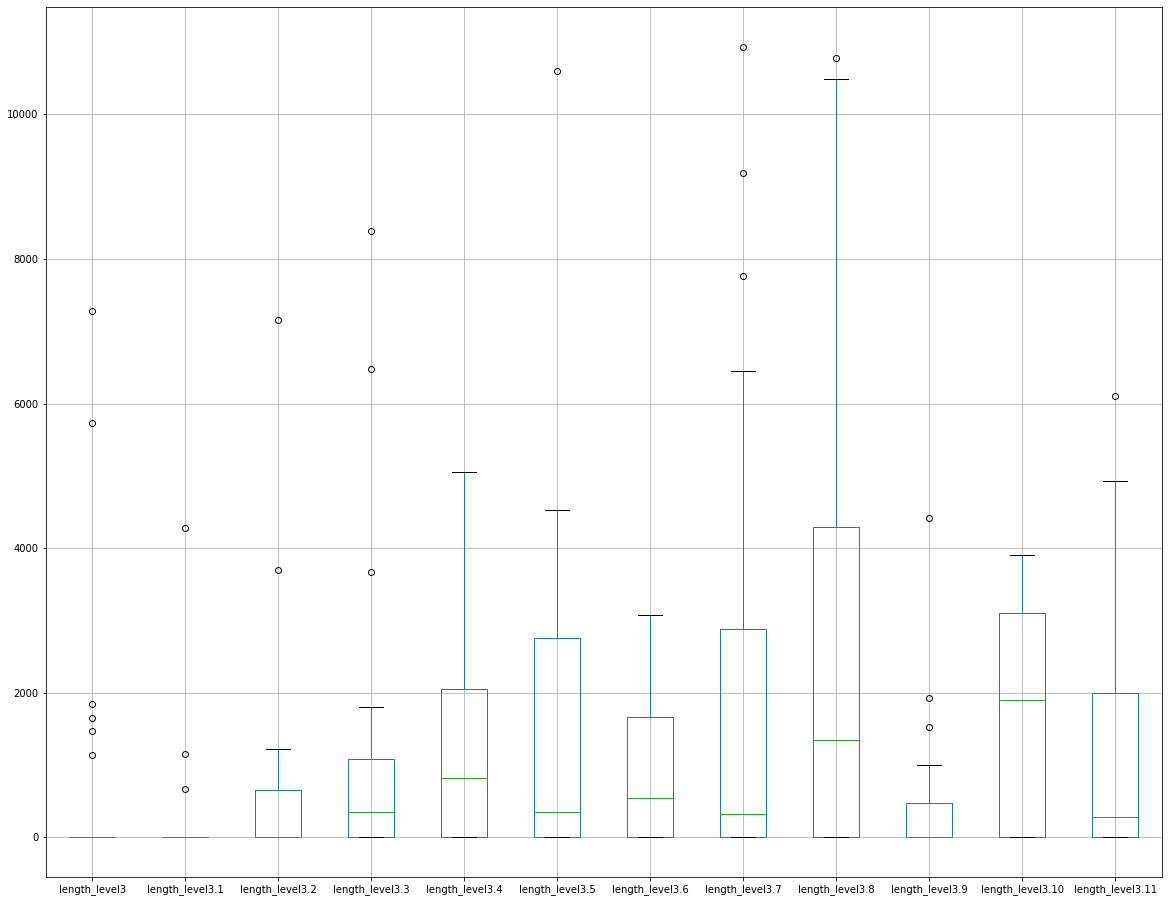

In [122]:
boxplot = all_horizons_df.boxplot(column=level_3_ls, figsize=(20, 16)) 

### Level-4

In [123]:
level_4_ls = ['length_level4',
 'length_level4.1',
 'length_level4.2',
 'length_level4.3',
 'length_level4.4',
 'length_level4.5',
 'length_level4.6',
 'length_level4.7',
 'length_level4.8',
 'length_level4.9',
 'length_level4.10',
 'length_level4.11']

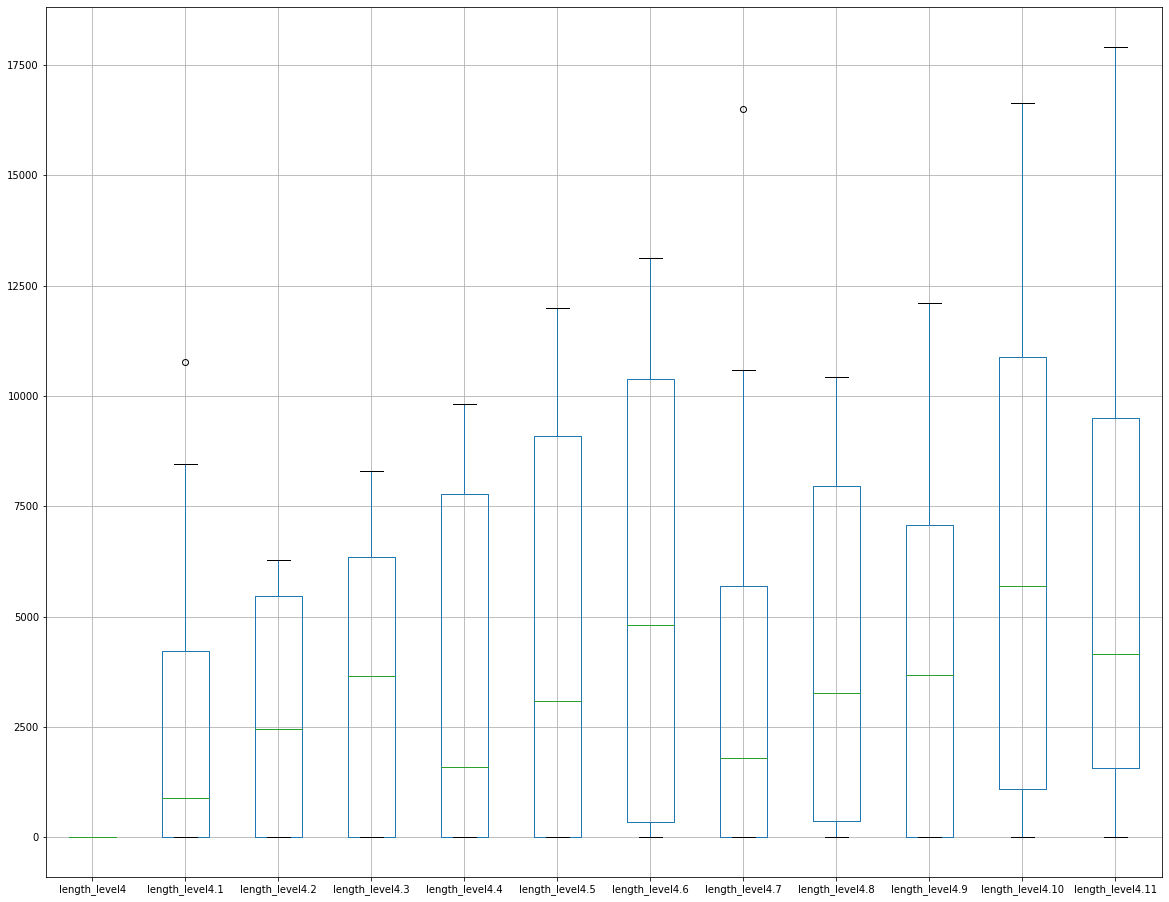

In [124]:
boxplot = all_horizons_df.boxplot(column=level_4_ls, figsize=(20, 16)) 

## Total Horizons Length (m)

In [125]:
cum_all_horizond_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\fault-dataset\Execl_files_work\after-reviwers\Cumulative-Hr-out-plot-Length_all_Hrs.csv')

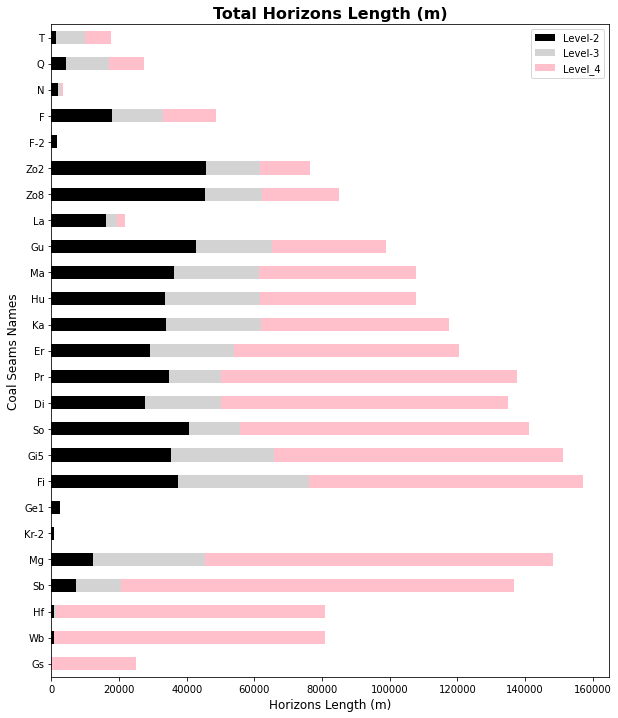

In [126]:
ax = cum_all_horizond_df.plot.barh(x='Horizon', stacked=True, figsize=(10, 12), 
                                   xlabel='Horizons', ylabel='Section-12 Total Horizons Length (m)',
                                   color =['black', 'lightgray', 'pink'])

ax.set_title('Total Horizons Length (m)', weight='bold', fontsize=16)
ax.invert_yaxis()
# Set x-axis label
ax.set_xlabel("Horizons Length (m)", weight='normal', size=12) # , labelpad=20

# Set y-axis label
ax.set_ylabel("Coal Seams Names", weight='normal', size=12);

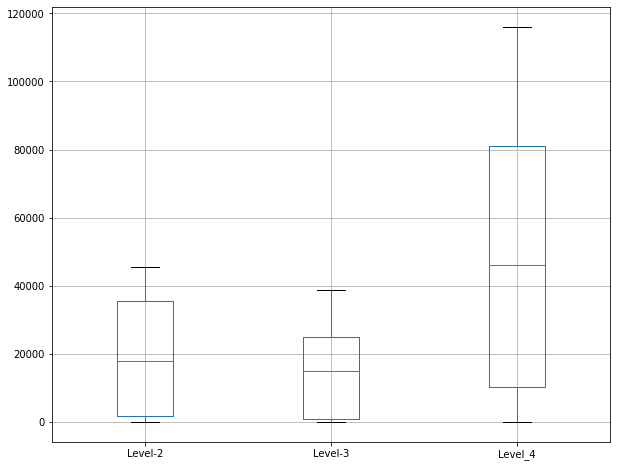

In [127]:
boxplot = cum_all_horizond_df.boxplot(column=cum_all_horizond_df.columns.tolist()[1:], figsize=(10, 8)) 

Prepared by: 
***Ramy Abdallah***

***Thank you!***